Notes:

image dataset importation 
https://www.youtube.com/watch?v=j-3vuBynnOE

data from
https://www.kaggle.com/piaoya/plastic-recycling-codes

In [101]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.decomposition import PCA


In [102]:
import os
import cv2



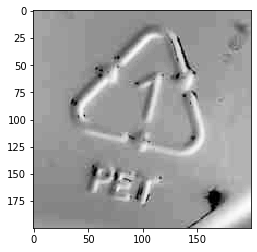

In [103]:
DataDir = "/Users/robertshiles/CSV_files/seven_plastics"
Catagories = ['1_polyethylene_PET',
'2_high_density_polyethylene_PE-HD',
'3_polyvinylchloride_PVC',
'4_low_density_polyethylene_PE-LD',
'5_polypropylene_PP',
'6_polystyrene_PS',
'7_other_resins',
'8_no_plastic',]
              
              
for catagory in Catagories:
    path = os.path.join(DataDir, catagory)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow((img_array), cmap = "Greys" )
        plt.show
        break
    break

In [104]:


print (img_array.shape)

(200, 200)


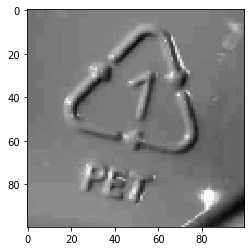

In [138]:
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [139]:
training_data = []

def create_training_data():
    for catagory in Catagories:
        path = os.path.join(DataDir, catagory)
        class_num = Catagories.index(catagory)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
                
create_training_data()

In [140]:
print('the length of the data is {}'.format(len(training_data)))
print('the format of the trainng data is {}'.format(training_data[0]))



the length of the data is 685
the format of the trainng data is [array([[209, 209, 209, ..., 211, 211, 211],
       [209, 209, 209, ..., 211, 211, 211],
       [209, 209, 209, ..., 211, 211, 211],
       ...,
       [213, 213, 213, ..., 210, 213, 215],
       [212, 212, 212, ..., 215, 217, 218],
       [211, 211, 211, ..., 219, 219, 220]], dtype=uint8), 0]


In [141]:
import random
random.shuffle(training_data)

In [142]:
for sample in training_data:
    print(sample[0])
    np.array(sample).reshape(-1,IMG_SIZE,IMG_SIZE,1)

[[253 250 245 ... 161 164 166]
 [248 250 246 ... 162 164 168]
 [252 249 246 ... 161 161 168]
 ...
 [135 141 146 ...  79  77  77]
 [127 128 136 ...  80  80  82]
 [125 114 116 ...  81  81  85]]


ValueError: cannot reshape array of size 2 into shape (100,100,1)

In [143]:
X = []
y = []
for features, lable in training_data:
    X.append(features.flatten())
    y.append(lable)
    
#X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)


In [144]:
for i in X:
    X[i]=X[i].f()

TypeError: only integer scalar arrays can be converted to a scalar index

In [190]:
print(len(X[0]))

10000


In [146]:
#conduct dimensionality reduction 
# We just want the first two principal components
pca = PCA(n_components=6)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X)

In [54]:
import pickle
pickle_out = open()

In [147]:
print(__doc__)

# Authors: Yann N. Dauphin, Vlad Niculae, Gabriel Synnaeve
# License: BSD

import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone


Automatically created module for IPython interactive environment


In [166]:
X_train, X_test, y_train, y_test,pca_components_train,pca_components_test = train_test_split(
    X, y,pca_components, test_size=0.2, random_state=0)


In [150]:
# Models we will use
logistic = linear_model.LogisticRegression(solver='newton-cg', tol=1)
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(
    steps=[('rbm', rbm), ('logistic', logistic)])


In [160]:
# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 10
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 1000
logistic.C = 6000

# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(X_train, y_train)

# Training the Logistic regression classifier directly on the pixel
raw_pixel_classifier = clone(logistic)
raw_pixel_classifier.C = 100.
raw_pixel_classifier.fit(X_train, y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = 0.00, time = 13.91s
[BernoulliRBM] Iteration 2, pseudo-likelihood = 0.00, time = 13.47s
[BernoulliRBM] Iteration 3, pseudo-likelihood = 0.00, time = 13.19s
[BernoulliRBM] Iteration 4, pseudo-likelihood = 0.00, time = 13.20s
[BernoulliRBM] Iteration 5, pseudo-likelihood = 0.00, time = 13.97s
[BernoulliRBM] Iteration 6, pseudo-likelihood = 0.00, time = 15.16s
[BernoulliRBM] Iteration 7, pseudo-likelihood = 0.00, time = 13.84s
[BernoulliRBM] Iteration 8, pseudo-likelihood = 0.00, time = 13.27s
[BernoulliRBM] Iteration 9, pseudo-likelihood = 0.00, time = 14.53s
[BernoulliRBM] Iteration 10, pseudo-likelihood = 0.00, time = 13.07s


/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=1, verbose=0,
                   warm_start=False)

In [161]:
y_pred = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(y_test, y_pred)))

y_pred = raw_pixel_classifier.predict(X_test)
print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(y_test, y_pred)))


Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        19
           4       0.29      1.00      0.45        40
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         6

    accuracy                           0.29       137
   macro avg       0.04      0.12      0.06       137
weighted avg       0.09      0.29      0.13       137


Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       0.37      0.32      0.34        22
           1       0.17      0.27      0.21        22
           2       0.00      0.00      0.00         5
           3       0.40      0.21      0.28  

/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


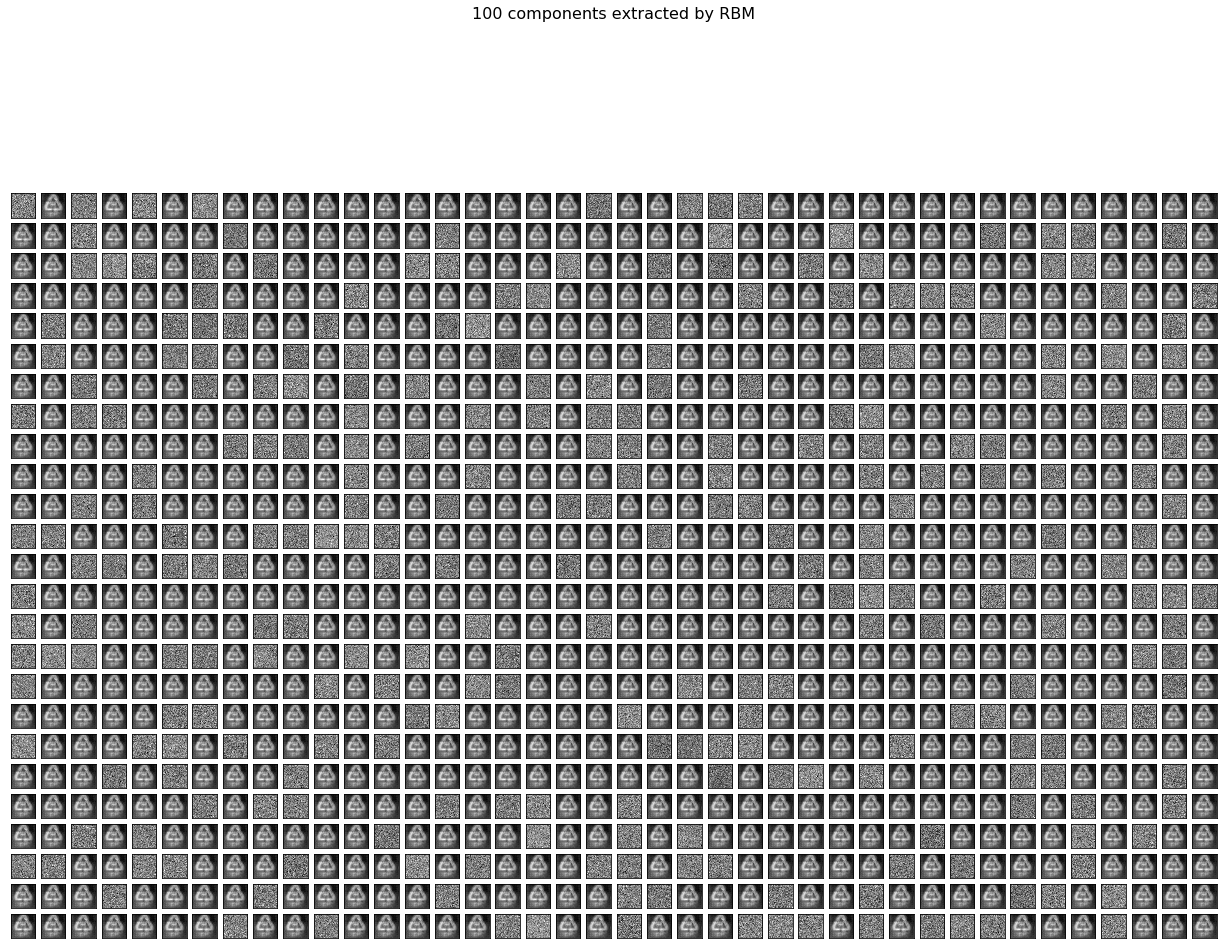

In [167]:

plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm.components_):
    plt.subplot(40, 40, i + 1)
    plt.imshow(comp.reshape((100, 100)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

In [194]:
# Alright! We've done our prep, let's build the model.
# Neural networks are hugely computationally intensive.
# This may take several minutes to run.

# Import the model.
from sklearn.neural_network import MLPClassifier

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(activation='relu',hidden_layer_sizes=(5000,4))
mlp.fit(X_train, y_train)

/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5000, 4), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
# your_model.out_activation_ = 'softmax'

In [195]:
mlp.score(X_train, y_train)

0.2773722627737226

In [196]:
# Alright! We've done our prep, let's build the model.
# Neural networks are hugely computationally intensive.
# This may take several minutes to run.

# Import the model.
from sklearn.neural_network import MLPClassifier

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(activation='relu',hidden_layer_sizes=(8000,12))
mlp.fit(X_train, y_train)

/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8000, 12), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [197]:
mlp.score(X_train, y_train)

0.2773722627737226

In [183]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()

score = cross_val_score(rfc, X, y, cv=10)
print(score)

/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.29166667 0.28169014 0.34285714 0.27142857 0.38235294 0.30882353
 0.41791045 0.29850746 0.31343284 0.29230769]


In [188]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()

score = cross_val_score(rfc, pca_components, y, cv=10)
print(score)

/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.31944444 0.28169014 0.28571429 0.32857143 0.30882353 0.33823529
 0.29850746 0.20895522 0.40298507 0.13846154]


/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Discussion:
    In compairing RBM MLP Classifier and the Random Forrest Classifier, the random forrest appeared to perform the best. Although non of the ALgorithms broke above 50 % accuracy. This suggests that the Dataset is quite difficult.  When examinng it by eye the differences between the classes are quite subtle. I belive that this will require another algorithm. 